<a href="https://colab.research.google.com/github/ravindu374/Hand-Written-Digits-Classification/blob/main/Handwritten_Digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
import numpy as np
from sklearn.model_selection import train_test_split

train_images_file_path = '/content/drive/MyDrive/archive/train_images.npy'
train_labels_file_path = '/content/drive/MyDrive/archive/train_labels.npy'
test_images_file_path = '/content/drive/MyDrive/archive/test_images.npy'
test_labels_file_path = '/content/drive/MyDrive/archive/test_labels.npy'

train_images = np.load(train_images_file_path)
train_labels = np.load(train_labels_file_path)
train_images,val_images,train_labels,val_labels = train_test_split(train_images,train_labels,test_size=0.17,random_state=42)
test_images = np.load(test_images_file_path)
test_labels = np.load(test_labels_file_path)

In [220]:
print("train_images shape =",train_images.shape)
print("train_labels shape =",train_labels.shape)

train_images shape = (49800, 28, 28)
train_labels shape = (49800,)


In [221]:
print("validation_images shape =",val_images.shape)
print("validation shape =",val_labels.shape)

validation_images shape = (10200, 28, 28)
validation shape = (10200,)


In [222]:
print("test_images shape =",test_images.shape)
print("test_labels shape =",test_labels.shape)

test_images shape = (10000, 28, 28)
test_labels shape = (10000,)


### Dataset Visualization

In [223]:
import matplotlib.pyplot as plt
def display_images(*args):
    num_images = len(args)
    num_cols = min(3, num_images)  # Max 3 images per row
    num_rows = int(np.ceil(num_images / num_cols))

    plt.figure(figsize=(5, 5))

    for i, idx in enumerate(args):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.title(f'Label = {train_labels[idx]}', fontsize=14)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

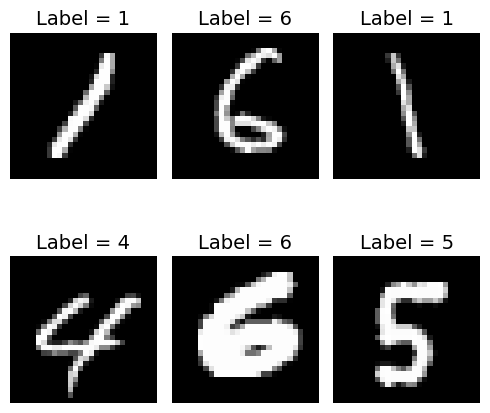

In [224]:
display_images(100,200,300,355,501,590)

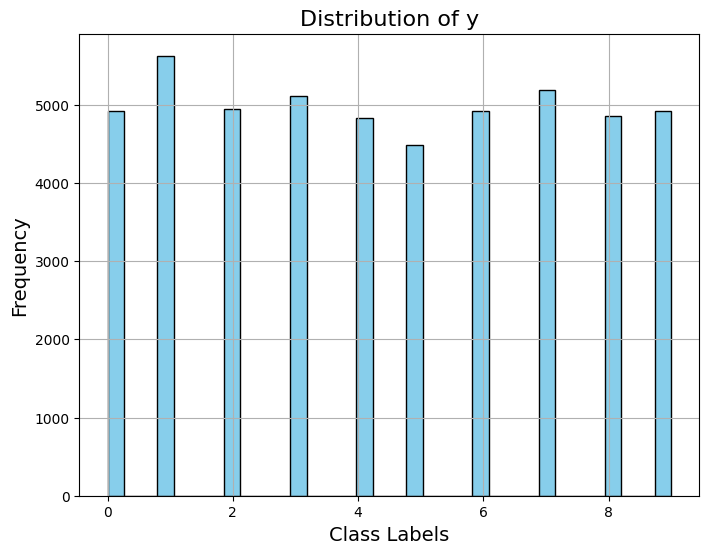

In [225]:
#plotting histogram of y
def plot_histogram(y):
  plt.figure(figsize=(8,6))
  plt.hist(y,bins='auto',color='skyblue', edgecolor='black')
  plt.title('Distribution of y', fontsize=16)
  plt.xlabel('Class Labels', fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(True)
  plt.show()

plot_histogram(train_labels)

In [226]:
x_train = train_images.reshape(-1, 28, 28, 1)
x_val = val_images.reshape(-1,28,28,1)
x_test = test_images.reshape(-1,28,28,1)

In [227]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(49800, 28, 28, 1)
(10200, 28, 28, 1)
(10000, 28, 28, 1)


In [228]:
#Normalization
x_train = train_images.astype("float32")/255.0
x_val = val_images.astype("float32")/255.0
x_test = test_images.astype("float32")/255.0

In [229]:
import tensorflow as tf
from keras import models
from keras import layers

model = models.Sequential()
# model.add(tf.keras.layers.Input(shape=(28,28,1)))

In [230]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [231]:
model.add(layers.MaxPooling2D(2,2))

In [232]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [233]:
model.add(layers.MaxPooling2D(2,2))

In [234]:
#model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [235]:
model.add(layers.Flatten())

In [236]:
model.add(layers.Dense(64, activation = 'relu'))

In [237]:
model.add(layers.Dense(10, activation = 'softmax'))

In [238]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     # or 'val_accuracy'
    patience=1,             # wait 1 epochs before stopping
    restore_best_weights=True
)


In [240]:
history = model.fit(x_train, train_labels, epochs = 5,validation_data = (x_val,val_labels), batch_size = 60)

Epoch 1/5
830/830 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8745 - loss: 0.4341 - val_accuracy: 0.9782 - val_loss: 0.0720
Epoch 2/5
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9810 - loss: 0.0597 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 3/5
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9885 - loss: 0.0399 - val_accuracy: 0.9880 - val_loss: 0.0387
Epoch 4/5
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9887 - val_loss: 0.0355
Epoch 5/5
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9882 - val_loss: 0.0385


In [241]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


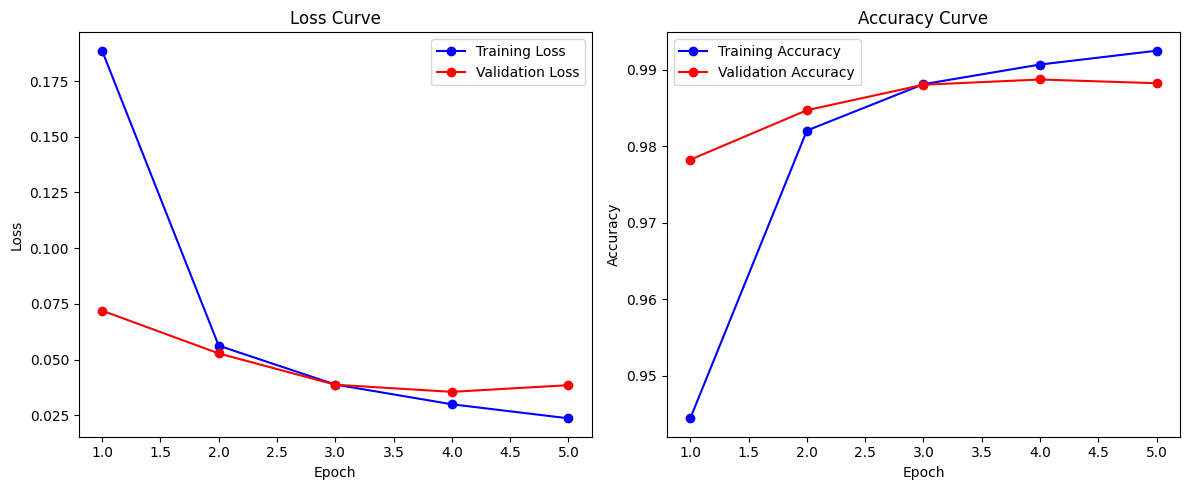

In [242]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [243]:
results = model.evaluate(x_test, test_labels, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9863 - loss: 0.0410


In [244]:
y_prediction_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [245]:
from sklearn.metrics import confusion_matrix

y_prediction = np.argmax(y_prediction_prob, axis=1)
cm = confusion_matrix(test_labels, y_prediction, normalize='true')

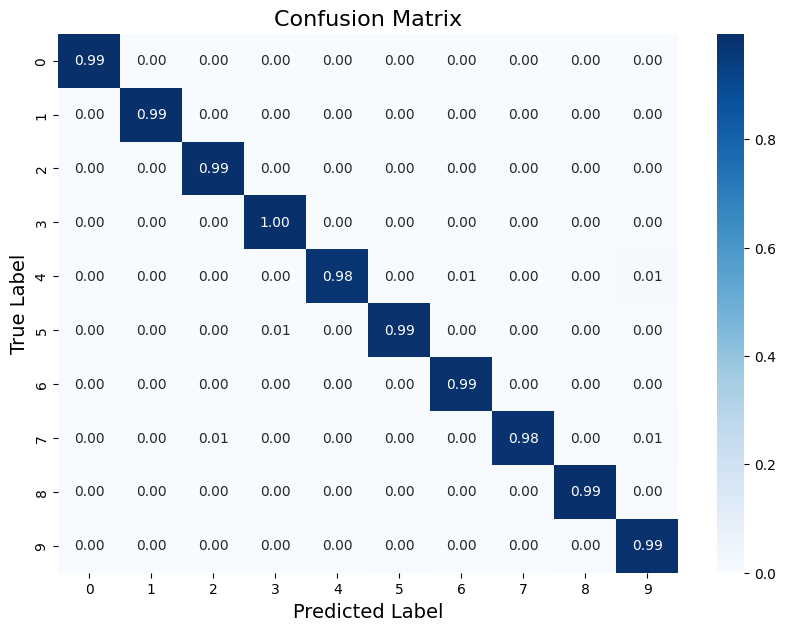

In [246]:
import seaborn as sns
# Plot confusion matrix using Seaborn
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

# Define class labels (0 to 9)
labels = [str(i) for i in range(10)]

# Plot the confusion matrix
plot_confusion_matrix(cm, labels)

In [247]:
y_prediction.shape

(10000,)